# Mechanical Design Analysis

Before manufacturing the prototype, the following steps and analysis should be completed.

1. Determine if the design is appropriate for the intended application.
2. Determine if the mechanism will work assuming all parts are made perfectly and are operating in an ideal environment.
3. Detailed design to ensure mechanism performance.

## Determine if Design is Appropriate

I would ask the customer a few questions to make sure that the prototype is appropriate. The questions would be as follow.

1. Does the prototype fit with the current system?
    - Is the prototype an acceptable size?
    - Does the prototype interface with the carriage work?
    - Will the prototype always be clear of the rest of the system and is the handle accessible to the user?
2. Is the design appropriate for the intended application?
    - What is the expected speed and frequency of switching modes?
    - Is manual meshing of the clamp and timing belt teeth acceptable?
    - Based on responses from the customer, the design might be rethought.
3. What are the operating conditions?
    - Temperature range, cleanliness
    - What is the expected life of the mechanism?
    - Learn about the different use cases to determine if anything was not considered.
    
## Determine if Mechanism Will Work under Ideal Conditions

Assuming the design is appropriate, I would determine if the mechanism will function given all parts are manufactured perfectly and it is operating in an ideal environment. It is assumed that the cam is brass, the shaft and fasteners are stainless steel, and the housing and other components are aluminum. The list of functionalities I would analyze are as follow.

1. Timing belt clamping in forward and reverse modes
2. No interferrence with timing belt in neutral mode
3. Remaining in selected mode and user ability to switch modes

### Clamping in Forward and Reverse Modes

<img src = "images/dwg1.png", width = 800>
<div style = "text-align: center">Geometry in Forward Mode</div>

When the handle is turned to the forward position, the cam will be in the position shown. In order for the clamp to function, tooth engagement between the belt and clamp should be maximum without the belt experiencing excessive clamping pressure. To achieve this, the teeth should be longer and slightly narrower on the clamp. The linear bearings will keep the clamp from rotating about the vertical axis while the cam will keep the clamp pressed to the timing belt against the plate. The bottom radius of the cam should be undersized to ensure clamping on top. The force from the cam is applied at the horizontal center of mass of the clamp along the entire depth of the clamp. Clamp vertical deflection should not be an issue due to the short length of the clamp and the presence of the linear bearings. The bottom of the housing has plenty of clearance with the bottom timing belt.

The reverse mode geometry will be the mirror of the forward mode geometry about the horizontal midplane of the mechanism.

### No Interferrence in Neutral Mode

<img src = "images/dwg2.png", width = 800>
<div style = "text-align: center">Geometry in Neutral Mode</div>

When the handle is turned to the neutral position, the cam will be in the position shown. The cam should be sized to have a close running or sliding fit with the clamp in this configuration so that the clamp will move very little with respect to the cam. The clamp is within the housing and has clearance with the timing belt teeth on top and bottom. It is assumed that the timing belt has enough tension so that it will not contact the plates on either side when not being pressed by the clamp. A chamfer could be added to the ends of the plates to prevent the back of the timing belt from catching.

### Remaining in Selected Mode and Switching Modes

For this design, the mechanism will remain in the selected mode unless the handle detent holding force is overcome. The calculations to determine the detent holding force follow.

<img src = "images/fbd1.jpg", width = 400>
<div style = "text-align: center">Free Body Diagram of Ball-Nose Plunger</div>

$r_{ball}$ is the radius of the ball<br>
$l_{plunger}$ is the length the ball extends below the device<br>
$d_{offset}$ is the distance between the device and the opposing surface<br>
$F_{spring}$ is the force the plunger spring exerts on the ball<br>
$F_{contact}$ is the force the edge of the hole exerts on the ball<br>
$\theta$ is the angle the contact force makes with vertical

\begin{align}
    \theta &= cos^{-1}(\frac{r_{ball} - l_{plunger} + d_{offset}}{r_{ball}})\\
    \sum F_y&: -F_{spring} + F_{contact} \cos(\theta) = 0\\
    \sum F_x&: -F_{hold} + F_{contact} \sin(\theta) = 0
\end{align}

In [6]:
import math

ball_diameter = .094 # inches
extended_length = .025 # inches
offset_distance = .010 # inches
extended_force = 2.0 # lbf
compressed_force = 5.0 # lbf

def calc_hold_force(plunger_length):
    '''
    Calculates holding force given plunger length.
    Parameter:
    plunger_length -- length ball extends below plunger
    Returns:
    tuple containing contact angle and holding force
    '''
    contact_angle = math.acos((((ball_diameter / 2.0) - plunger_length) + offset_distance) / (ball_diameter / 2.0))
    spring_force = (compressed_force - extended_force) * (extended_length - plunger_length) + extended_force
    contact_force = spring_force / math.cos(contact_angle)
    hold_force = contact_force * math.sin(contact_angle)
    return (contact_angle, hold_force)

print("When plunger fully extended:")
(contact_angle_fe, hold_force_fe) = calc_hold_force(extended_length)
print("contact angle = %.3g degrees" %math.degrees(contact_angle_fe))
print("hold force = %.3g lbf" %hold_force_fe)
print("required hole diameter = %.3g inches" %(2.0 * (ball_diameter / 2.0) * math.sin(contact_angle_fe)))

When plunger fully extended:
contact angle = 47.1 degrees
hold force = 2.15 lbf
required hole diameter = 0.0688 inches


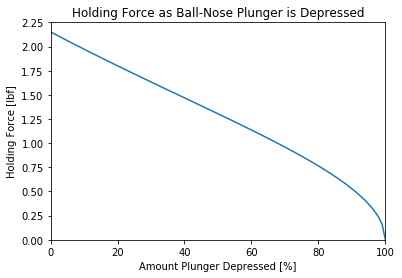

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt

max_length = extended_length
min_length = offset_distance
depress_percentages = []
hold_forces = []
for depress_percentage in range(0, 101, 1):
    plunger_length = max_length - ((depress_percentage / 100.0) * (max_length - min_length))
    (contact_angle, hold_force) = calc_hold_force(plunger_length)
    depress_percentages.append(depress_percentage)
    hold_forces.append(hold_force)
plt.plot(depress_percentages, hold_forces)
plt.xlabel("Amount Plunger Depressed [%]")
plt.ylabel("Holding Force [lbf]")
plt.axis([0, 100, 0, 2.25])
plt.title("Holding Force as Ball-Nose Plunger is Depressed")
plt.show()

The holding force seems reasonable for this application. The calculations to determine the force required to switch modes follow.

<img src = "images/fbd2.jpg", width = 600>
<div style = "text-align: center">Free Body Diagram of Handle</div>

$r_{handle}$ is the radius of the handle<br>
$r_{cam}$ is the distance from the center of the cam to the clamp<br>
$d$ is the horizontal distance between the shaft axis and where the clamp weight is applied to the cam<br>
$F_{switch}$ is the force required to move the handle<br>
$F_{hold}$ is the holding force of the ball-nose plunger<br>
$F_{clamp}$ is the weight of the clamp<br>
$F_{friction}$ is force of friction between the clamp and cam<br>
$T_{bearings}$ is the torsional resistance of the bearings (assume negligible)<br>

The force from the clamp on the cam is approximated as the weight of the clamp, but it will be greater if the clamping pressure is non-zero. Assuming just the weight of the clamp will give a close-enough estimate.

\begin{align}
    \sum M_c&: F_{switch} r_{handle} - F_{hold} r_{handle} - F_{friction} r_{cam} - F_{clamp} d - T_{bearings} = 0
\end{align}

In [68]:
hold_force = hold_force_fe # lbf
handle_radius = 1.750 # inches
cam_weight = .4 # lbm
friction_coef = .4 # static for brass and steel contact (https://www.engineersedge.com/coeffients_of_friction.htm)

# Case 1: Forward Mode to Neutral
cam_max_radius = .710 # inches
cam_min_radius = .490 # inches
switch_force = (hold_force * handle_radius + friction_coef * cam_weight * cam_max_radius) / handle_radius
print("Case 1: switch force = %.3g lbf" %switch_force)

# Case 2: Neutral Mode to Forward
cam_radius = .600 # inches
d = .110 # inches
switch_force = (hold_force * handle_radius + friction_coef * cam_weight * cam_radius + cam_weight * d) / handle_radius
print("Case 2: switch force = %.3g lbf" %switch_force)

Case 1: switch force = 2.22 lbf
Case 2: switch force = 2.23 lbf


The switching force is reasonable for a human operator. Now, the force the ball-nose plunger exerts on the handle when it is between modes will be calculated. It is equal to the spring force when the ball is depressed enough for the handle to rotate.

In [71]:
spring_force = (compressed_force - extended_force) * (extended_length - min_length) + extended_force
print("Ball-nose plunger force on handle = %.3g" %spring_force)

Ball-nose plunger force on handle = 2.04


This is a small force on the handle given that it is 1/8" thick. The arced track is the same thickness. The deflection of these components does not need to be investigated further unless mass optimization is desired or another material is selected. Additionally, the ball-nose plunger position can be adjusted to allow for any minor deflections.

## Detailed Design

The following is a list of detail design tasks.

- Design practices
    - Design for manufacturability
    - Design for assembly
    - Conventions
- Clamp
    - Tooth dimensions
    - Critical tolerances
- Cam
    - Critial tolerances and fits
- Shaft and components
    - Tolerances and fits
- Radial bearings
    - Specify wave spring
    - Critial fits
    - Life analysis
- Linear bearings
    - Critical tolerances and fits
- Thermal effects
    - Steps to take if large temperature range
    
### Design Practices

All custom parts are designed so they can be manufactured. The housing front and back and handle should be made on a CNC mill. The clamp teeth could be cut by a gear manufacturer. All other parts can be made on a mill or lathe.

The mechanism is designed so that it will be easy to assemble. The housing is made of 4 parts for this reason. Fasteners with the same thread size and pitch are used to reduce the number of tools required for assembly. An assembly procedure video is below. Note that the fasteners attaching the front and back housings should be tightened after everything else is in place. This way, the cam shaft and shoulder screws are aligning the front and back housings.

Threaded inserts are specified for all fasteners that thread into aluminum. The thread engagement for each fastener is > 1D. Threadlocker could be applied for additional fastener security.

In [1]:
from IPython.display import YouTubeVideo
# Mechanism Assembly Procedure
YouTubeVideo('Q9OaxQSBcWk')

### Clamp

The clamp needs to be designed such that it will fully mesh with the timing belt teeth without overstressing them or clamping the belt with too much pressure, which could lead to faster belt wear. I would first check with the timing belt manufacturer to see if there is a clamping pressure limit specification. The following is an engineering drawing of the clamp with only critical dimensions shown.

<img src = "images/clamp.png", width = 700>
<div style = "text-align: center">Clamp Drawing</div>

- The clamp teeth are specified to be longer than the timing belt teeth and the width of the clamp teeth are undersized to ensure that the timing belt teeth are not overstressed during clamping.
- A pitch to pitch tolerance of +- .001" was recommended by SDP/SI (http://www.sdp-si.com/PDFS/Technical-Section-Timing.pdf; pg. 46).
- Linear bearing hole tolerances are driven by its housing specifications (https://www.mcmaster.com/#9533t1/=19tijwe).
- The linear bearings should be shimmed so they will not move with respect to the clamp.

### Cam

The cam needs to be designed so that the side that presses the cam is held to a tight tolerance with respect to the shaft center. This will ensure that the clamp and timing belt teeth fully mesh.

<img src = "images/cam.png", width = 750>
<div style = "text-align: center">Cam Drawing</div>

- The cam is given a sliding fit with the clamp.
- The cam is given a location interference fit with the shaft.

### Shaft and Components

In order for the all the components to be tight on the shaft, the shaft should be toleranced to be shorter than the sum of the components. The shaft also needs to have a press fit with the bearings. The spacers should be machined after a test fit to eliminate axial tolerance stack-up. The spacers should have a slip fit with the shaft.

<img src = "images/shaft.png", width = 400>
<div style = "text-align: center">Cross Section to Show Shaft</div>

### Bearings

Whenever bearings are in a design, I would typically perform bearing life calculations to detemine if the bearings will last for the intended life of the system. In this case, the loads and speeds that the bearings are seeing are very small compared to their specifications.

R8-2Z Radial bearing specifications:
- dynamic radial load capaticy = 915 lbf
- static radial load capacity = 505 lbf
- maximum speed = 27000 rpm

Linear bearing specifications:
- dynamic load capability = 50 lbf at 100 fpm
- static load capability = 935 lbf

Since these bearings will not experience continuous motion and are very lightly loaded, the life calculations are not that meaningful.

The wave spring should be specified to provide enough axial load on the bearings to remove internal play. The additional bennefit of a wave spring for preloading is that if there is any coefficient of thermal expansion mismatch in the components on the shaft or housing, the spring can be specified to retain the axial load desite the gap.

For this application, a light preload will suffice (~1% of bearing load capacity (http://web.mit.edu/2.75/fundamentals/FUNdaMENTALs%20Book%20pdf/FUNdaMENTALs%20Topic%2010.PDF)). This is approxiamtely 5 lbf.

The bearing in the front housing should have a press fit with the housing. The bearing in the back housing should have a slip fit with the housing. This prevents over constraining the shaft.

### Thermal Effects

If the temperature range is expected to be large, thermal coefficient of expansion mismatches should be considered. The fits between parts with dissimilar materials will be altered. The following equation is the strain given a change in temperature.

\begin{align}
    \epsilon = \alpha \triangle T
\end{align}

|  Material       | $\alpha$ [m/m K]|
|:----------------|:----------------|
| Aluminum        | 21 - 24         |
| Brass           | 18 - 19         |
| Stainless Steel | 10 - 17         |

(https://www.engineeringtoolbox.com/linear-expansion-coefficients-d_95.html)

Additionally, the fits on the bearings should be investigated. The bearings will fail if the Hertzian stress at the ball and race contact becomes too great.